# Sorted sampling issue

**Goal:** ...
  
This notebook is divided in two parts:
* **1. Bla**

In [1]:
%run ../setup_environment.ipy
%run ../Selene_Job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

# How is the dataset sorted?

In [58]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)
print(data.impact.shape)
data.impact.head()

(194211, 64)


,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_EXON,VEP_INTRON,VEP_IMPACT,VEP_CLIN_SIG,VEP_COSMIC_CNT,VEP_gnomAD_AF,sample_mut_key,patient_key,frequency_in_normals,VEP_SIFT_class,VEP_SIFT_score,VEP_PolyPhen_class,VEP_PolyPhen_score,VEP_in_dbSNP,VEP_gnomAD_total_AF_AFR,VEP_gnomAD_total_AF_AMR,VEP_gnomAD_total_AF_ASJ,VEP_gnomAD_total_AF_EAS,VEP_gnomAD_total_AF_FIN,VEP_gnomAD_total_AF_NFE,VEP_gnomAD_total_AF_OTH,VEP_gnomAD_total_AF_max,VEP_gnomAD_total_AF,Kaviar_AF,is_a_hotspot,is_a_3d_hotspot,oncogenic,gene_type,is_artefact
0,TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,AUTO_OK,344,17_7577515_T_G,Sub,TP53,c.766A>C,p.T256P,non_synonymous_codon,missense_variant,TP53,c.766A>C,p.T256P,T/P,SNV,7|11,NaN,MODERATE,unknown,1,0.000000,P-0000012-T02-IM3_17_7577515_T_G,P-0000012,0.0,deleterious,0.00,probably_damaging,0.999,False,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,unknown,unknown,Likely Oncogenic,tsg,False
1,PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,AUTO_OK,428,1_46521514_G_C,Sub,PIK3R3,c.1032C>G,p.I344M,non_synonymous_codon,missense_variant,PIK3R3,c.894C>G,p.I298M,I/M,SNV,7|10,NaN,MODERATE,unknown,0,0.000000,P-0000012-T03-IM3_1_46521514_G_C,P-0000012,0.0,deleterious,0.00,benign,0.277,False,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,unknown,unknown,Unknown,tsg,False
2,ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,AUTO_OK,428,3_142178126_C_A,Sub,ATR,c.7292G>T,p.R2431M,non_synonymous_codon,missense_variant,ATR,c.7292G>T,p.R2431M,R/M,SNV,43|47,NaN,MODERATE,unknown,0,0.000004,P-0000012-T03-IM3_3_142178126_C_A,P-0000012,0.0,deleterious,0.00,probably_damaging,0.997,True,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.000009,0.000005,0.000007,unknown,unknown,Unknown,tsg,False
3,PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,p.L465M,570,0.20351,116,811,0.00000,0,252,202,66,50,AUTO_OK,428,4_55139732_T_A,Sub,PDGFRA,c.1393T>A,p.L465M,non_synonymous_codon,missense_variant,PDGFRA,c.1393T>A,p.L465M,L/M,SNV,10|23,NaN,MODERATE,unknown,0,0.000000,P-0000012-T03-IM3_4_55139732_T_A,P-0000012,0.0,deleterious,0.01,probably_damaging,0.965,False,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,unknown,unknown,Unknown,oncogene,False
4,FBXW7,4,153249542,153249542,splicing,SNP,C,A,P-0000012-T03-IM3,c.1237-1G>T,NaN,333,0.25526,85,458,0.00000,0,69,179,24,61,AUTO_OK,428,4_153249542_C_A,Sub,FBXW7,c.1237-1G>T,p.?,splice_site_variant,splice_acceptor_variant,FBXW7,c.1237-1G>T,unknown,unknown,SNV,NaN,8|11,HIGH,unknown,0,0.000000,P-0000012-T03-IM3_4_153249542_C_A,P-0000012,0.0,unknown,NaN,unknown,NaN,False,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,unknown,unknown,Likely Oncogenic,tsg,False


In [59]:
original_impact = pd.read_csv('../../../data/all_IMPACT_mutations_180508.txt', sep='\t', low_memory=False)
original_impact['sample_mut_key'] = original_impact.apply(lambda x: '{}_{}_{}_{}_{}'.format(x['Tumor_Sample_Barcode'],
                                                                                            x['Chromosome'],
                                                                                            x['Start_Position'],
                                                                                            x['Reference_Allele'],
                                                                                            x['Tumor_Seq_Allele2']),
                                                          axis=1)

In [60]:
original_impact = original_impact[original_impact['sample_mut_key'].isin(data.impact['sample_mut_key'])]
print(original_impact.shape)
original_impact.head()

(195208, 36)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,occurence_in_normals,confidence_class,variant_status,sample_coverage,minor_contamination,sample_mut_key
33,TP53,0,MSK-IMPACT,hg19,17,7577515,7577515,+,nonsynonymous_SNV,SNP,T,T,G,novel,P-0000012-T02-IM3,NaN,T,T,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,0,AUTO_OK,NEW_VARIANT,344,0.00810,P-0000012-T02-IM3_17_7577515_T_G
36,PIK3R3,0,MSK-IMPACT,hg19,1,46521514,46521514,+,nonsynonymous_SNV,SNP,G,G,C,novel,P-0000012-T03-IM3,NaN,G,G,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,0,AUTO_OK,NEW_VARIANT,428,0.00398,P-0000012-T03-IM3_1_46521514_G_C
37,ATR,0,MSK-IMPACT,hg19,3,142178126,142178126,+,nonsynonymous_SNV,SNP,C,C,A,novel,P-0000012-T03-IM3,NaN,C,C,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,0,AUTO_OK,NEW_VARIANT,428,0.00398,P-0000012-T03-IM3_3_142178126_C_A
38,PDGFRA,0,MSK-IMPACT,hg19,4,55139732,55139732,+,nonsynonymous_SNV,SNP,T,T,A,novel,P-0000012-T03-IM3,NaN,T,T,c.1393T>A,p.L465M,570,0.20351,116,811,0.00000,0,252,202,66,50,0,AUTO_OK,NEW_VARIANT,428,0.00398,P-0000012-T03-IM3_4_55139732_T_A
39,FBXW7,0,MSK-IMPACT,hg19,4,153249542,153249542,+,splicing,SNP,C,C,A,novel,P-0000012-T03-IM3,NaN,C,C,c.1237-1G>T,NaN,333,0.25526,85,458,0.00000,0,69,179,24,61,0,AUTO_OK,NEW_VARIANT,428,0.00398,P-0000012-T03-IM3_4_153249542_C_A


In [61]:
sample_mut_key_before = original_impact['sample_mut_key'].copy()
original_impact.drop_duplicates('sample_mut_key', keep=False, inplace=True)
sample_mut_key_after  = original_impact['sample_mut_key'].copy()

print(original_impact.shape)

(193214, 36)


In [62]:
len(list(set(sample_mut_key_before) - set(sample_mut_key_after)))

997

In [63]:
data.impact = data.impact[~data.impact['sample_mut_key'].isin(list(set(sample_mut_key_before) - set(sample_mut_key_after)))]
print(data.impact.shape)

(193214, 64)


In [65]:
all(data.impact['sample_mut_key'].reset_index(drop=True) == original_impact['sample_mut_key'].reset_index(drop=True))

True

# Local test fold

## Get *shuffled* sampling

In [83]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [84]:
X_shuffled, y_shuffled = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_shuffled, y_shuffled)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [85]:
data.get_original_impact()['patient_key'].head()

83138     P-0029172
193823    P-0002232
94891     P-0019875
180448    P-0013581
5390      P-0001042
Name: patient_key, dtype: object

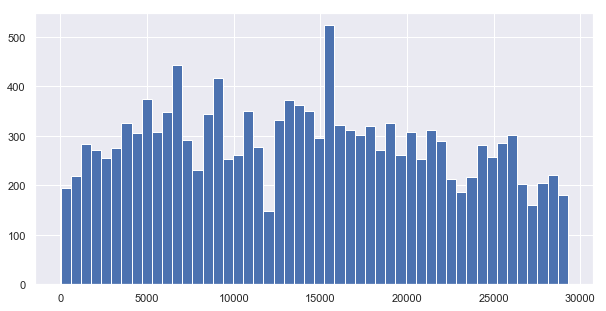

In [86]:
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

X: (7199, 45) | y: (7199,)


,count_,freq_
True,7199,100.0%


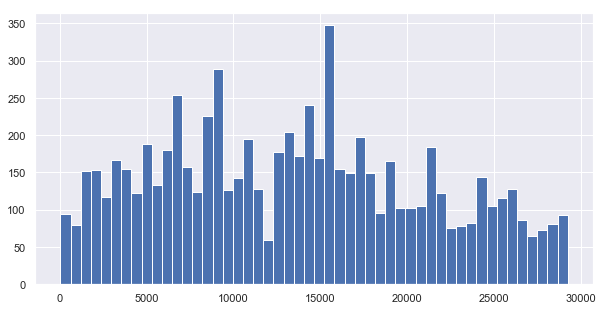

In [87]:
X_temp, y_temp = data.get_X_and_y('all', range(4 * data.positive_class_number, 4 * data.positive_class_number))
Impact_Wrapper.print_info(X_temp, y_temp)
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

## Get *sorted* sampling

In [88]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [89]:
X_sorted, y_sorted = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_sorted, y_sorted)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [90]:
data.get_original_impact()['patient_key'].head()

75712     P-0012508
194060    P-0029250
85586     P-0013886
174354    P-0026257
5326      P-0001093
Name: patient_key, dtype: object

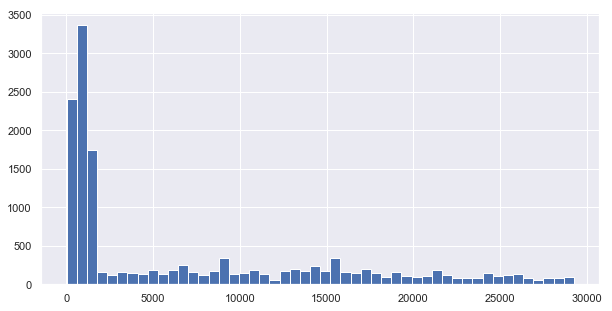

In [91]:
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


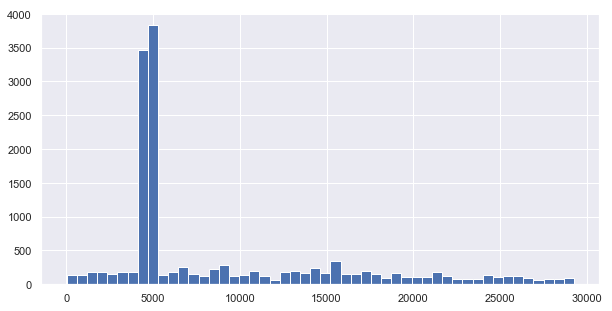

In [92]:
X_temp, y_temp = data.get_X_and_y('all', range(3 * data.positive_class_number, 4 * data.positive_class_number))
Impact_Wrapper.print_info(X_temp, y_temp)
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

## Ridge Regression (L2 regularization)

In [21]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [13]:
summary = Summary()

In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, n_jobs=5)
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, n_jobs=5)
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (6.12s)
▴ Mean average_precision: 0.879 ± 0.004
▴ Mean roc_auc          : 0.847 ± 0.008
▴ Mean precision        : 0.879 ± 0.015
▴ Mean recall           : 0.646 ± 0.008
▴ Mean f1               : 0.745 ± 0.004
▴ Mean accuracy         : 0.778 ± 0.004

Run model... done! (3.93s)
▴ Mean average_precision: 0.912 ± 0.003
▴ Mean roc_auc          : 0.891 ± 0.005
▴ Mean precision        : 0.883 ± 0.011
▴ Mean recall           : 0.737 ± 0.015
▴ Mean f1               : 0.803 ± 0.005
▴ Mean accuracy         : 0.820 ± 0.003


## Random Forest

In [15]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, n_jobs=5)
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RandomForest_shuffled', 'indigo')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, n_jobs=5)
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RandomForest_sorted', 'navy')

Run model... done! (25.66s)
▴ Mean average_precision: 0.915 ± 0.007
▴ Mean roc_auc          : 0.895 ± 0.008
▴ Mean precision        : 0.887 ± 0.009
▴ Mean recall           : 0.730 ± 0.013
▴ Mean f1               : 0.801 ± 0.011
▴ Mean accuracy         : 0.819 ± 0.010

Run model... done! (26.82s)
▴ Mean average_precision: 0.945 ± 0.004
▴ Mean roc_auc          : 0.935 ± 0.004
▴ Mean precision        : 0.899 ± 0.004
▴ Mean recall           : 0.814 ± 0.009
▴ Mean f1               : 0.854 ± 0.005
▴ Mean accuracy         : 0.861 ± 0.004


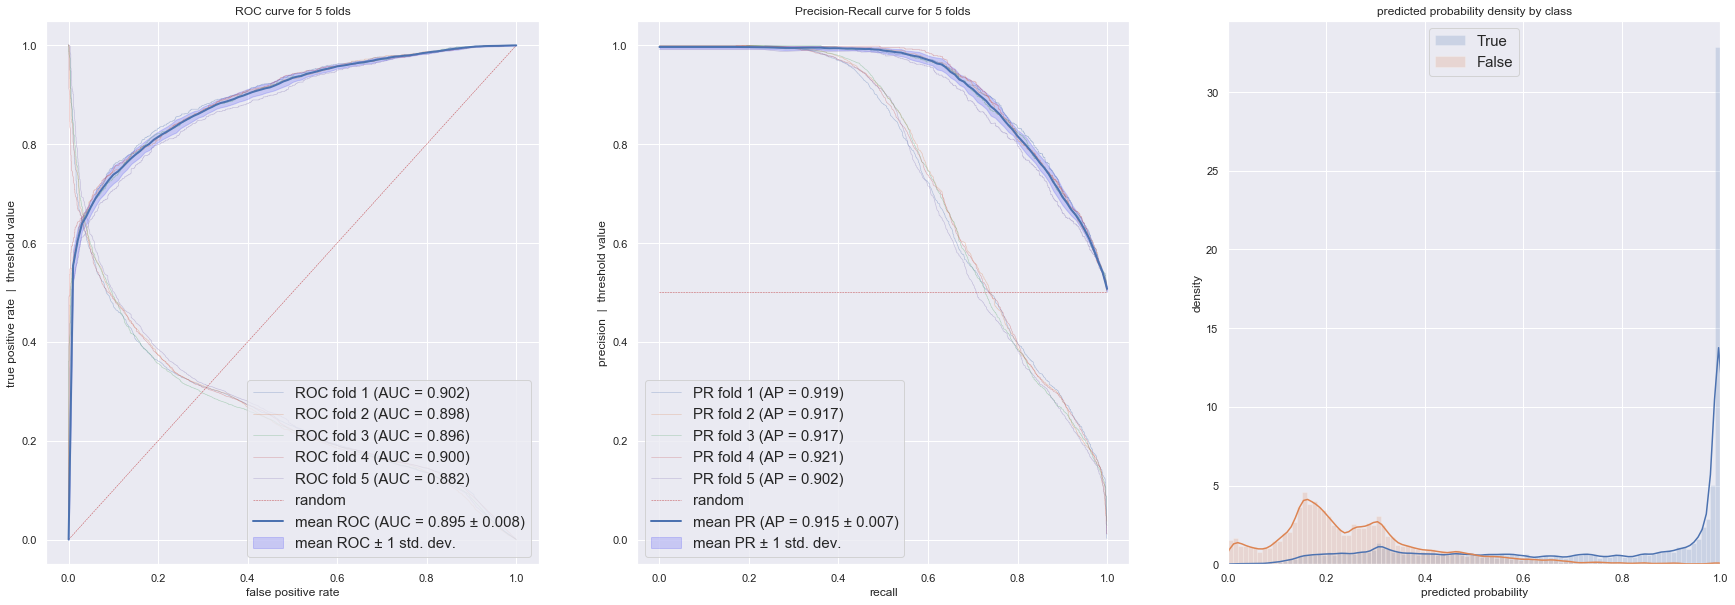

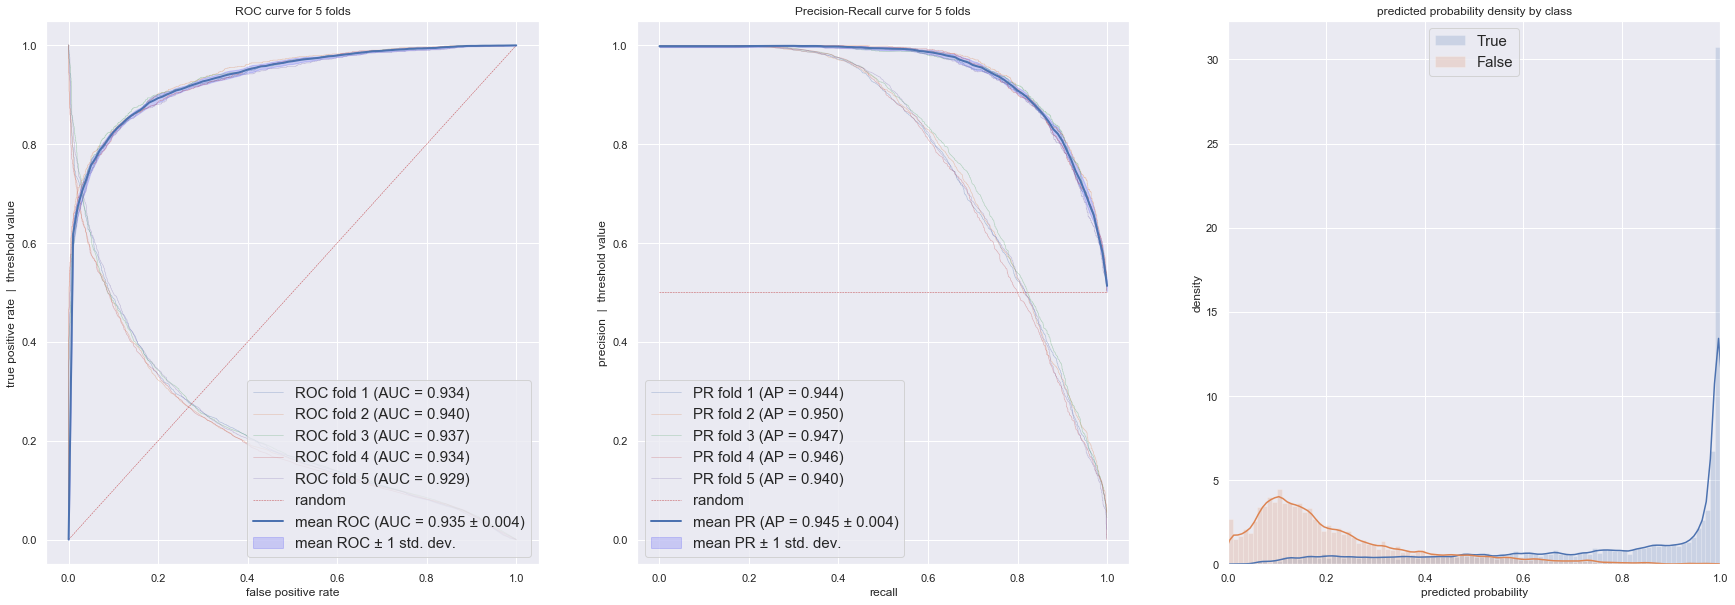

In [16]:
metrics_shuffled.plot_threshold_decision_curves()
metrics_sorted.plot_threshold_decision_curves()

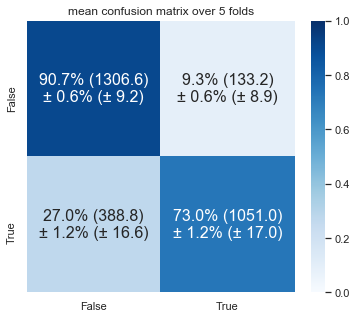

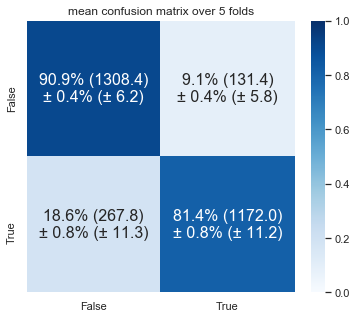

In [17]:
metrics_shuffled.plot_mean_confusion_matrix()
metrics_sorted.plot_mean_confusion_matrix()

,test_average_precision_mean,test_roc_auc_mean,test_precision_mean,test_recall_mean,test_f1_mean,test_accuracy_mean
metrics_name,,,,,,
RidgeRegression_shuffled,0.879,0.847,0.879,0.646,0.745,0.778
RidgeRegression_sorted,0.912,0.891,0.883,0.737,0.803,0.82
RandomForest_shuffled,0.915,0.895,0.887,0.73,0.801,0.819
RandomForest_sorted,0.945,0.935,0.899,0.814,0.854,0.861


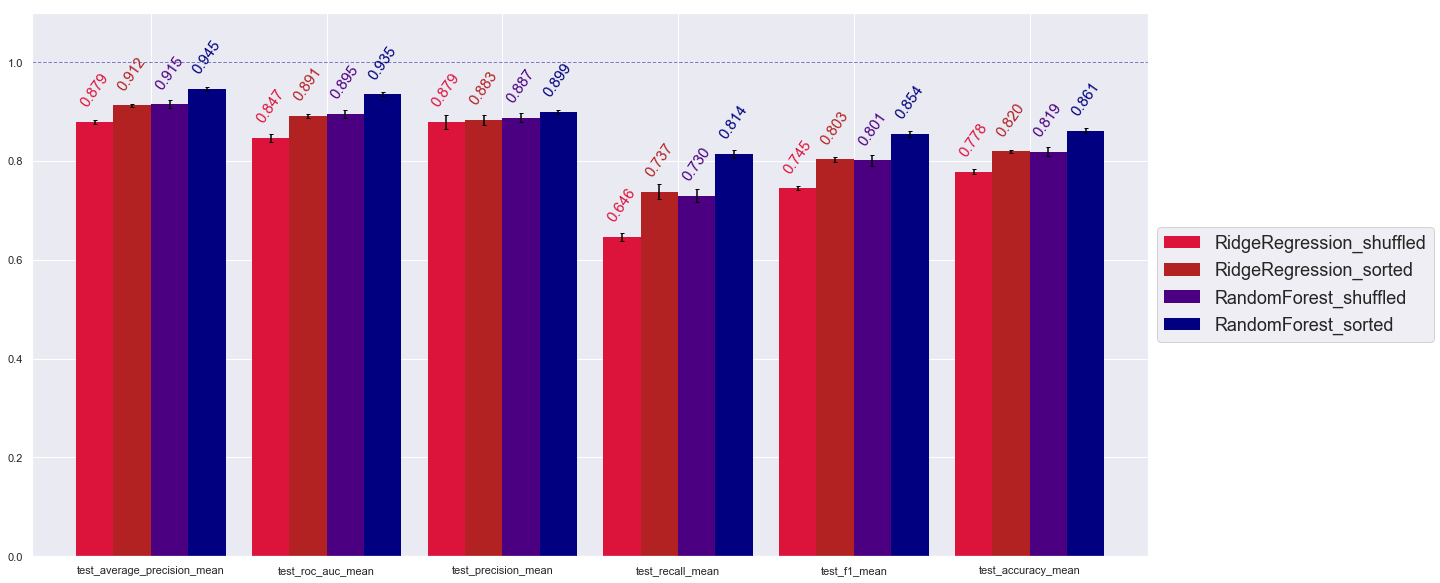

In [70]:
summary.display()
summary.plot(fontsize=15)

# Global test fold

## Get *shuffled* sampling

In [19]:
class CustomFolds:
    def __init__(self, X, y, X_small, y_small, cv_strategy):
        self.train_indices = []
        self.test_indices  = []
        
        for i, (train_index_X_small, test_index_X_small) in enumerate(cv_strategy.split(X_small, y_small)):
            print('  - fold %d/%d...' % (i + 1, cv_strategy.get_n_splits()))
            print('Train ({:6d}): {}'.format(len(train_index_X_small), train_index_X_small))
            print('Test  ({:6d}): {}'.format(len(test_index_X_small) , test_index_X_small))

            # We do the transformations:
            # real index for X_small -> label index (for both X_small and X) -> real index for X
            train_index_label = X_small.iloc[train_index_X_small].index
            train_index_X  = np.array([X.index.get_loc(i) for i in train_index_label])

            test_index_X = np.array(list(set(range(0, X.shape[0])) - set(train_index_X)))

            print('Train ({:6d}): {}'.format(len(train_index_X), train_index_X))
            print('Test  ({:6d}): {}'.format(len(test_index_X) , test_index_X))

            self.train_indices.append(train_index_X)
            self.test_indices.append(test_index_X)
            
            display(get_table(y_small.iloc[test_index_X_small]))
            display(get_table(y.iloc[test_index_X]))

            print()
    
    
    def split(self, X, y, groups=None):
        for train_index, test_index in zip(self.train_indices, self.test_indices):
            yield train_index, test_index

    def get_n_splits(self, groups=None):
        return len(self.train_indices)

In [20]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [21]:
X_all_shuffled, y_all_shuffled = data.get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X_all_shuffled, y_all_shuffled)

X: (194211, 45) | y: (194211,)


,count_,freq_
False,187012,96.3%
True,7199,3.7%


In [22]:
custom_cv_shuffled = CustomFolds(X_all_shuffled, y_all_shuffled, X_shuffled, y_shuffled, cv_strategy)

  - fold 1/5...
Train ( 11518): [ 2862  2863  2864 ... 14395 14396 14397]
Test  (  2880): [   0    1    2 ... 2896 2897 2898]
Train ( 11518): [187722  28725 149659 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 2/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [2862 2863 2864 ... 5798 5803 5804]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 3/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [5690 5691 5694 ... 8642 8643 8645]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 4/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [ 8633  8634  8635 ... 11538 11539 11541]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 5/5...
Train ( 11520): [    0     1     2 ... 11538 11539 11541]
Test  (  2878): [11485 11487 11488 ... 14395 14396 14397]
Train ( 11520): [105031 130342 105374 ... 158451 114724 188577]
Test  (182691): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1439,50.0%
False,1439,50.0%


,count_,freq_
False,181252,99.2%
True,1439,0.8%


In [23]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [24]:
X_all_sorted, y_all_sorted = data.get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X_all_sorted, y_all_sorted)

X: (194211, 45) | y: (194211,)


,count_,freq_
False,187012,96.3%
True,7199,3.7%


In [25]:
custom_cv_sorted = CustomFolds(X_all_sorted, y_all_sorted, X_sorted, y_sorted, cv_strategy)

  - fold 1/5...
Train ( 11518): [ 2862  2863  2864 ... 14395 14396 14397]
Test  (  2880): [   0    1    2 ... 2896 2897 2898]
Train ( 11518): [187722  28725 149659 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 2/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [2862 2863 2864 ... 5798 5803 5804]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 3/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [5690 5691 5694 ... 8642 8643 8645]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 4/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [ 8633  8634  8635 ... 11538 11539 11541]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 5/5...
Train ( 11520): [    0     1     2 ... 11538 11539 11541]
Test  (  2878): [11485 11487 11488 ... 14395 14396 14397]
Train ( 11520): [105031 130342 105374 ... 158451 114724 188577]
Test  (182691): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1439,50.0%
False,1439,50.0%


,count_,freq_
False,181252,99.2%
True,1439,0.8%


## Ridge Regression (L2 regularization)

In [26]:
summary_2 = Summary()

In [27]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_all_shuffled, y_all_shuffled, custom_cv_shuffled, n_jobs=5)
metrics_shuffled.print_mean()
summary_2.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_all_sorted, y_all_sorted, custom_cv_sorted, n_jobs=5)
metrics_sorted.print_mean()
summary_2.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (12.24s)
▴ Mean average_precision: 0.273 ± 0.004
▴ Mean roc_auc          : 0.848 ± 0.006
▴ Mean precision        : 0.057 ± 0.004
▴ Mean recall           : 0.646 ± 0.008
▴ Mean f1               : 0.105 ± 0.007
▴ Mean accuracy         : 0.912 ± 0.008

Run model... done! (9.94s)
▴ Mean average_precision: 0.227 ± 0.013
▴ Mean roc_auc          : 0.803 ± 0.010
▴ Mean precision        : 0.020 ± 0.000
▴ Mean recall           : 0.737 ± 0.015
▴ Mean f1               : 0.038 ± 0.001
▴ Mean accuracy         : 0.708 ± 0.004


## Random Forest

In [28]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_shuffled = Metrics(model, X_all_shuffled, y_all_shuffled, custom_cv_shuffled, n_jobs=5)
metrics_shuffled.print_mean()
summary_2.add(metrics_shuffled, 'RandomForest_shuffled', 'indigo')
print()
metrics_sorted = Metrics(model, X_all_sorted, y_all_sorted, custom_cv_sorted, n_jobs=5)
metrics_sorted.print_mean()
summary_2.add(metrics_sorted, 'RandomForest_sorted', 'navy')

Run model... done! (295.41s)
▴ Mean average_precision: 0.338 ± 0.013
▴ Mean roc_auc          : 0.894 ± 0.005
▴ Mean precision        : 0.057 ± 0.002
▴ Mean recall           : 0.730 ± 0.013
▴ Mean f1               : 0.107 ± 0.003
▴ Mean accuracy         : 0.903 ± 0.002

Run model... done! (313.95s)
▴ Mean average_precision: 0.305 ± 0.007
▴ Mean roc_auc          : 0.855 ± 0.005
▴ Mean precision        : 0.020 ± 0.000
▴ Mean recall           : 0.814 ± 0.009
▴ Mean f1               : 0.039 ± 0.001
▴ Mean accuracy         : 0.681 ± 0.004


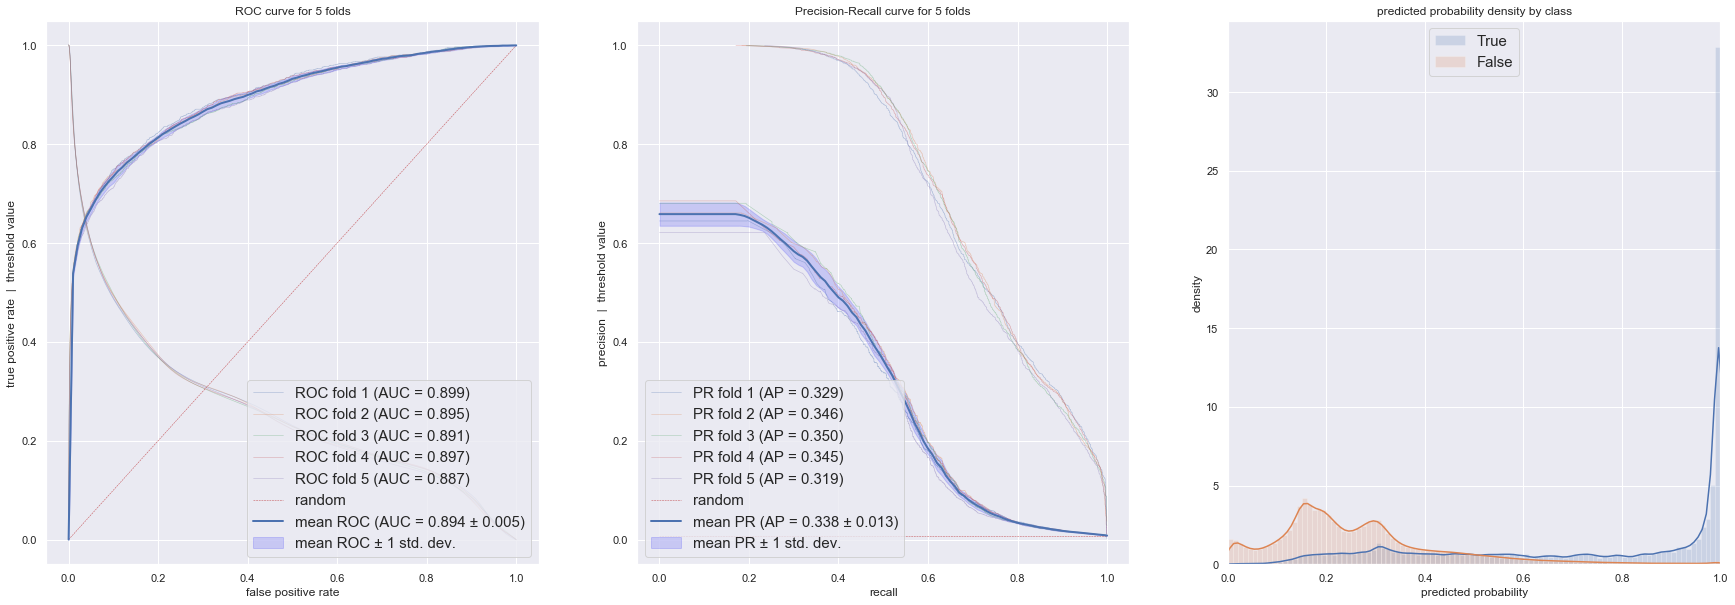

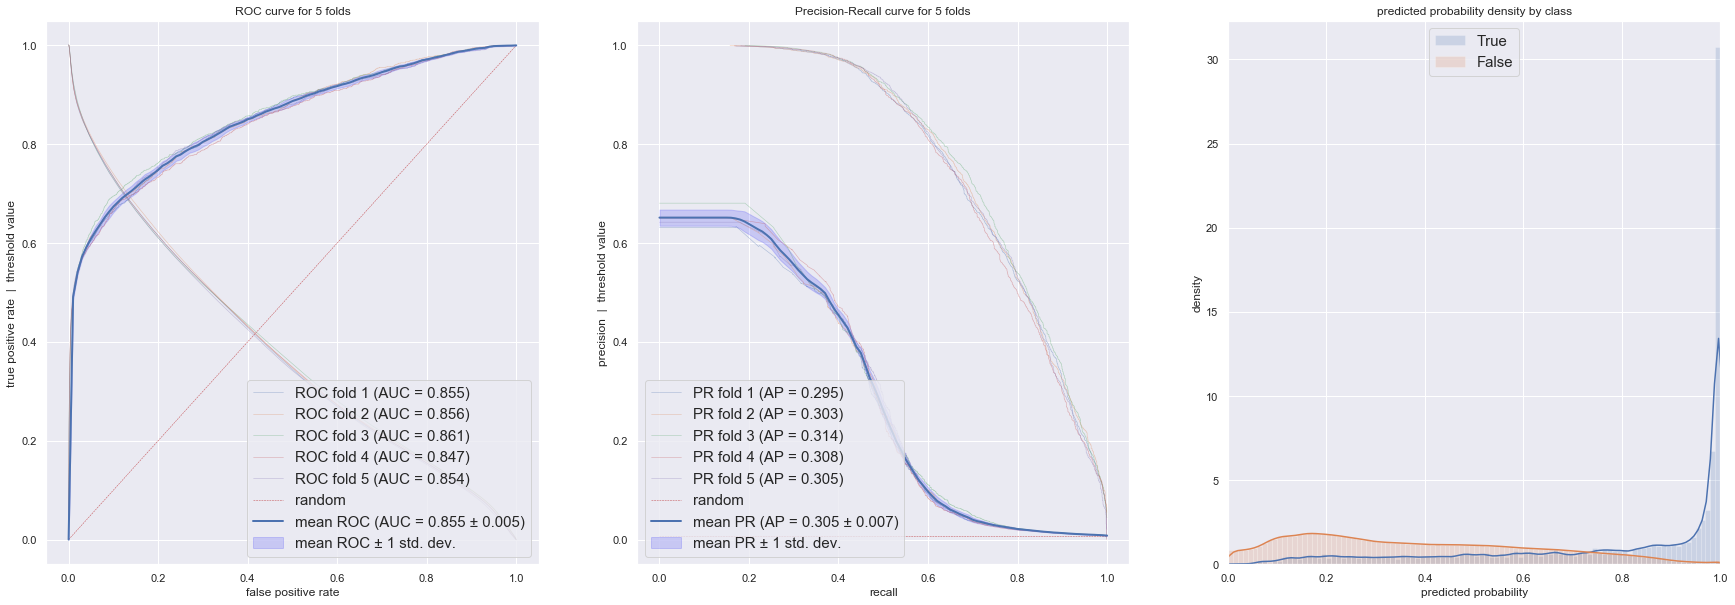

In [29]:
metrics_shuffled.plot_threshold_decision_curves()
metrics_sorted.plot_threshold_decision_curves()

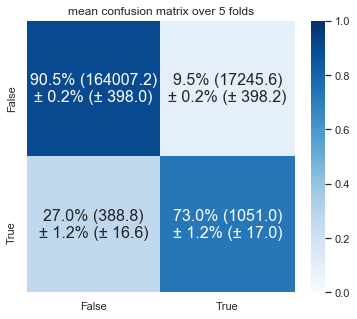

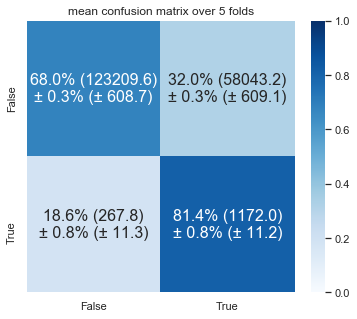

In [30]:
metrics_shuffled.plot_mean_confusion_matrix()
metrics_sorted.plot_mean_confusion_matrix()

,test_average_precision_mean,test_roc_auc_mean,test_precision_mean,test_recall_mean,test_f1_mean,test_accuracy_mean
metrics_name,,,,,,
RidgeRegression_shuffled,0.273,0.848,0.0569,0.646,0.105,0.912
RidgeRegression_sorted,0.227,0.803,0.0196,0.737,0.0382,0.708
RandomForest_shuffled,0.338,0.894,0.0575,0.73,0.107,0.903
RandomForest_sorted,0.305,0.855,0.0198,0.814,0.0386,0.681


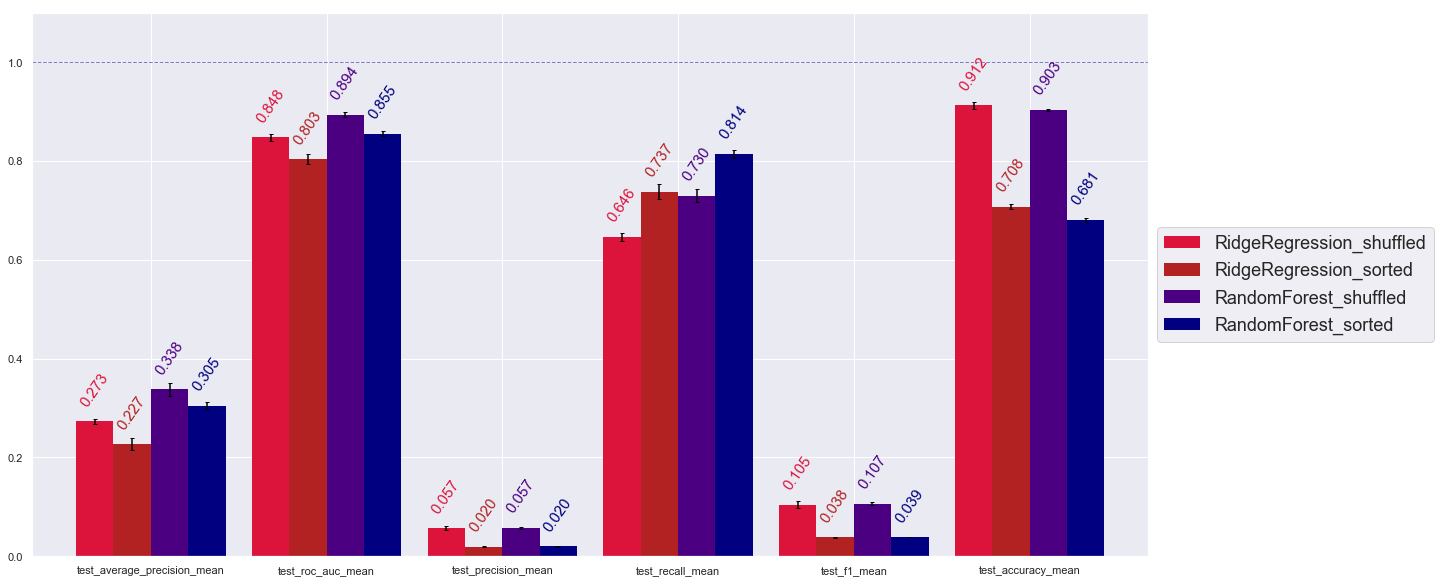

In [71]:
summary_2.display()
summary_2.plot(fontsize=15)

# GroupKFold for patients

## Get *shuffled* sampling

In [32]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [33]:
X_shuffled, y_shuffled = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_shuffled, y_shuffled)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [34]:
groups_shuffled = data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])).values

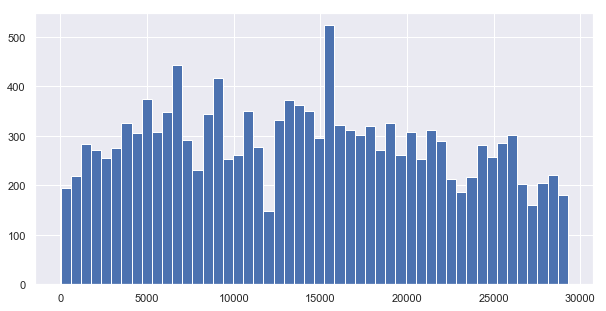

In [35]:
plt.figure(figsize=(10, 5))
plt.hist(groups_shuffled, bins = 50);

## Get *sorted* sampling

In [36]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [37]:
X_sorted, y_sorted = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_sorted, y_sorted)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [38]:
groups_sorted = data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])).values

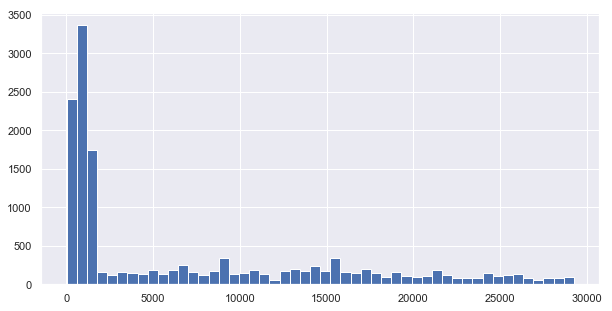

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(groups_sorted, bins = 50);

## Ridge Regression (L2 regularization)

In [40]:
from sklearn.model_selection import GroupKFold
cv_strategy = GroupKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [41]:
summary_3 = Summary()

In [42]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, groups=groups_shuffled, n_jobs=5)
metrics_shuffled.print_mean()
summary_3.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, groups=groups_sorted, n_jobs=5)
metrics_sorted.print_mean()
summary_3.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (5.12s)
▴ Mean average_precision: 0.878 ± 0.013
▴ Mean roc_auc          : 0.846 ± 0.018
▴ Mean precision        : 0.875 ± 0.021
▴ Mean recall           : 0.652 ± 0.028
▴ Mean f1               : 0.747 ± 0.022
▴ Mean accuracy         : 0.779 ± 0.018

Run model... done! (4.87s)
▴ Mean average_precision: 0.911 ± 0.010
▴ Mean roc_auc          : 0.888 ± 0.016
▴ Mean precision        : 0.877 ± 0.031
▴ Mean recall           : 0.735 ± 0.017
▴ Mean f1               : 0.799 ± 0.014
▴ Mean accuracy         : 0.815 ± 0.021


## Random Forest

In [43]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, groups=groups_shuffled, n_jobs=5)
metrics_shuffled.print_mean()
summary_3.add(metrics_shuffled, 'RandomForest_shuffled', 'indigo')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, groups=groups_sorted, n_jobs=5)
metrics_sorted.print_mean()
summary_3.add(metrics_sorted, 'RandomForest_sorted', 'navy')

Run model... done! (24.16s)
▴ Mean average_precision: 0.911 ± 0.010
▴ Mean roc_auc          : 0.889 ± 0.010
▴ Mean precision        : 0.887 ± 0.021
▴ Mean recall           : 0.720 ± 0.019
▴ Mean f1               : 0.795 ± 0.015
▴ Mean accuracy         : 0.814 ± 0.013

Run model... done! (25.36s)
▴ Mean average_precision: 0.936 ± 0.005
▴ Mean roc_auc          : 0.920 ± 0.013
▴ Mean precision        : 0.889 ± 0.013
▴ Mean recall           : 0.801 ± 0.016
▴ Mean f1               : 0.843 ± 0.008
▴ Mean accuracy         : 0.850 ± 0.014


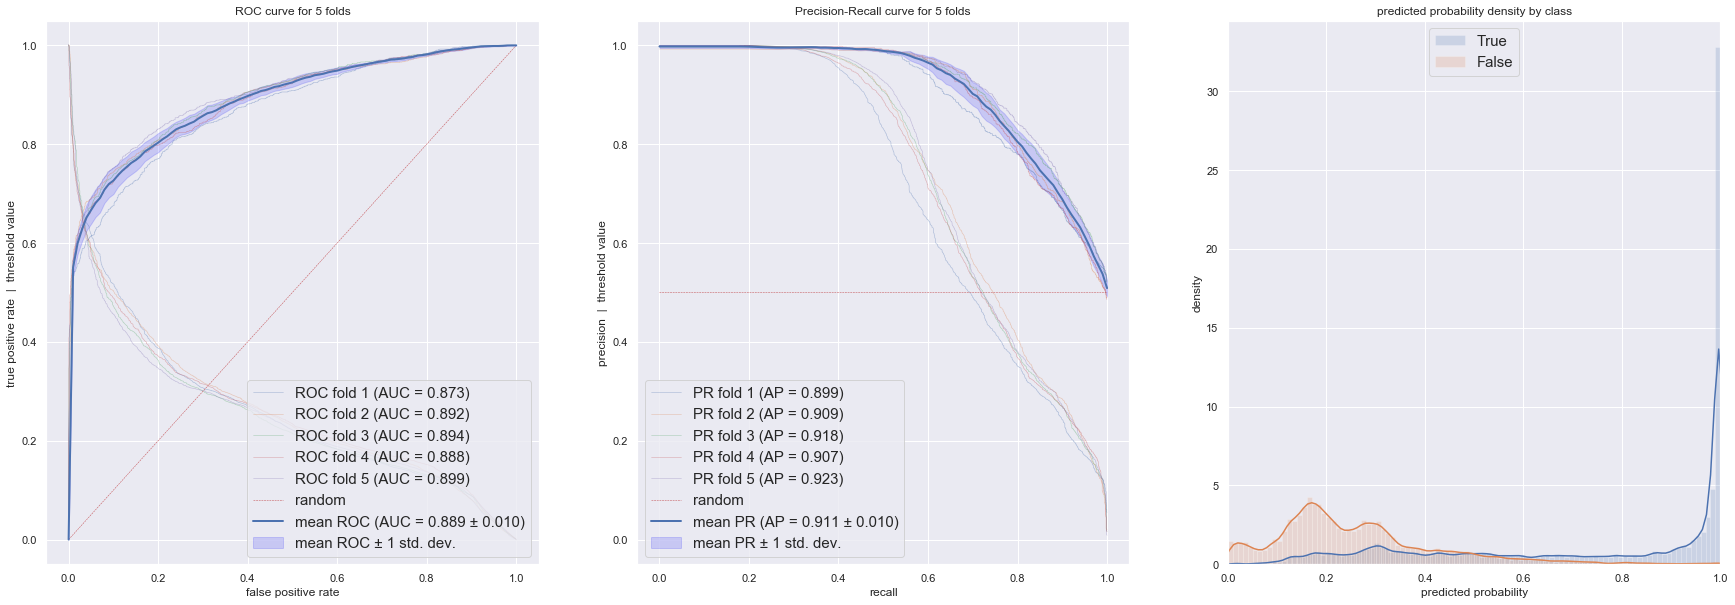

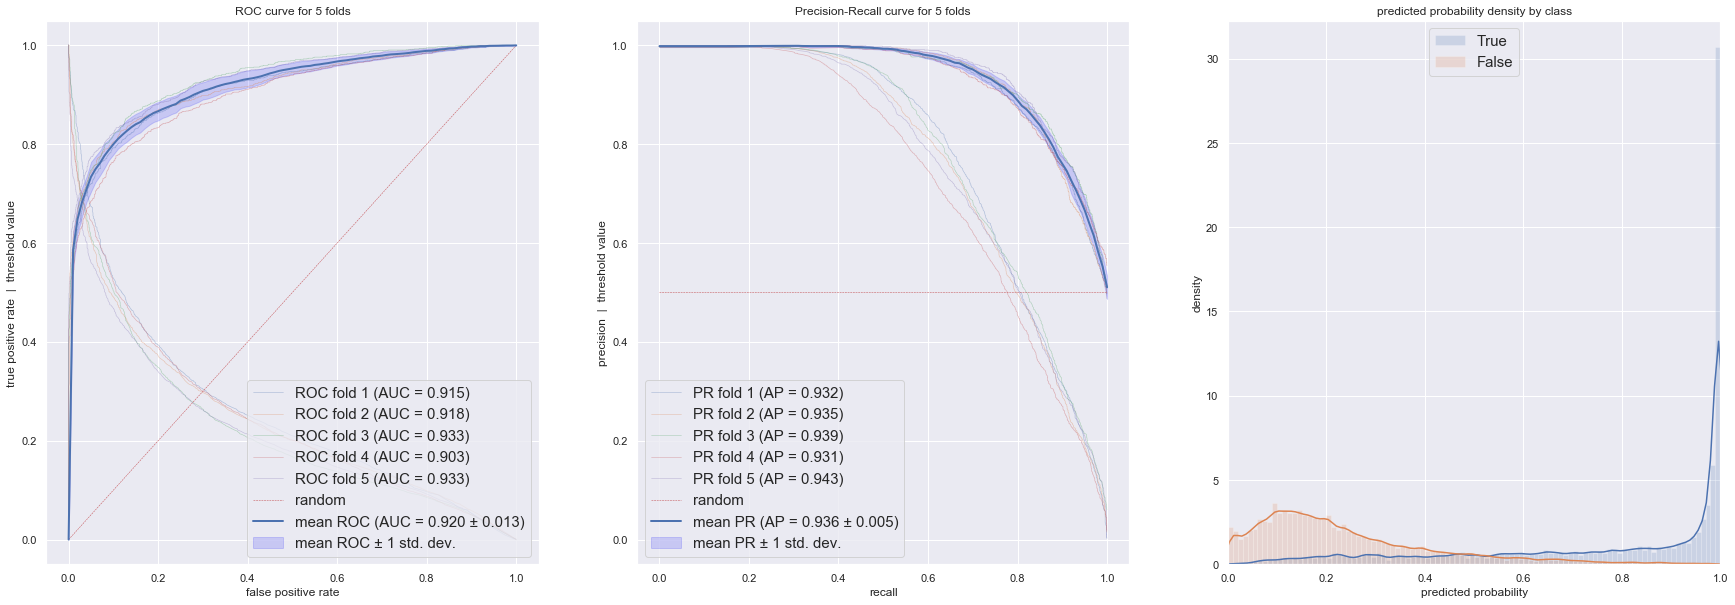

In [44]:
metrics_shuffled.plot_threshold_decision_curves()
metrics_sorted.plot_threshold_decision_curves()

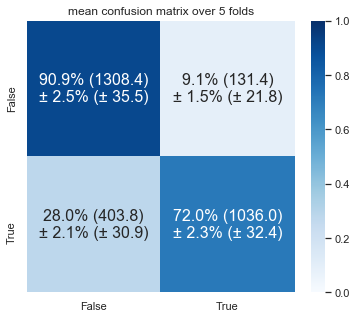

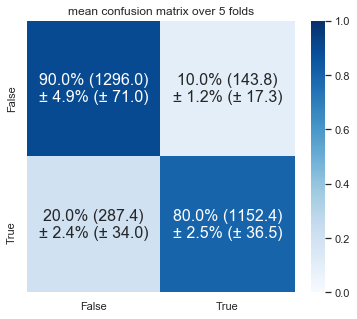

In [45]:
metrics_shuffled.plot_mean_confusion_matrix()
metrics_sorted.plot_mean_confusion_matrix()

,test_average_precision_mean,test_roc_auc_mean,test_precision_mean,test_recall_mean,test_f1_mean,test_accuracy_mean
metrics_name,,,,,,
RidgeRegression_shuffled,0.878,0.846,0.875,0.652,0.747,0.779
RidgeRegression_sorted,0.911,0.888,0.877,0.735,0.799,0.815
RandomForest_shuffled,0.911,0.889,0.887,0.72,0.795,0.814
RandomForest_sorted,0.936,0.92,0.889,0.801,0.843,0.85


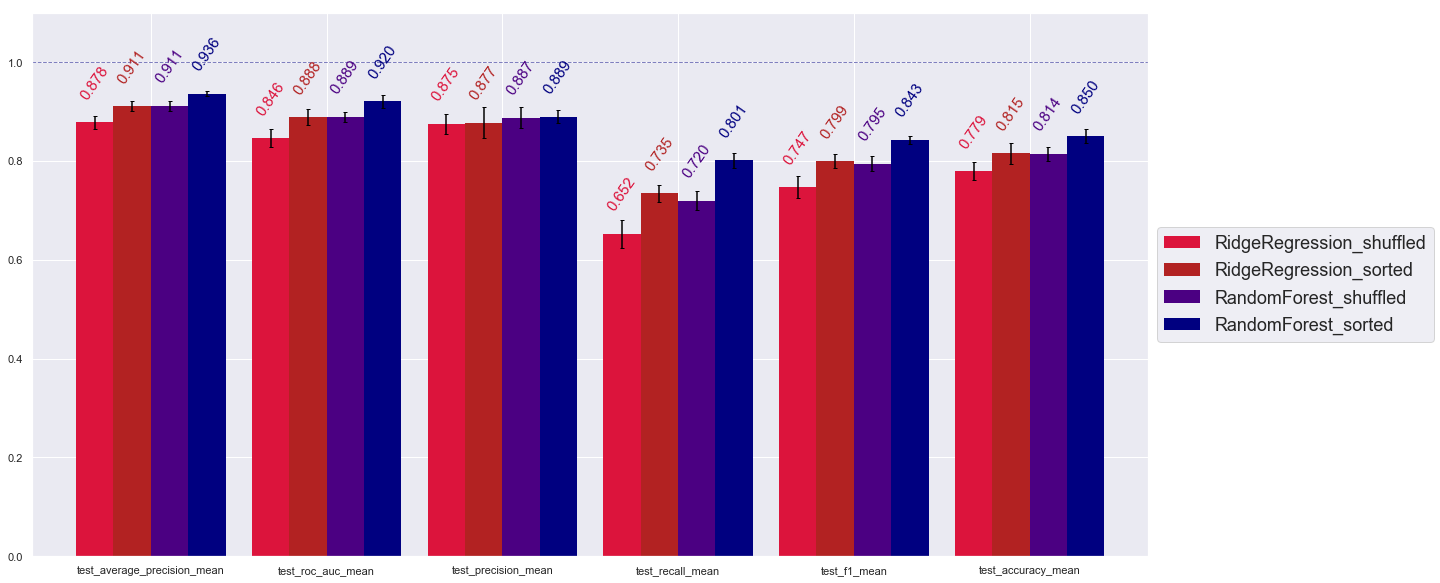

In [72]:
summary_3.display()
summary_3.plot(fontsize=15)

# Various checks

In [31]:
%run ../impact_wrapper.py

<Figure size 432x288 with 0 Axes>

In [32]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

In [33]:
data.impact['patient_key'].sort_values().head(10)

29856     None-T01-
54922     None-T01-
23285     None-T01-
117745    None-T01-
127537    None-T01-
41777     None-T01-
133166    P-0000012
5474      P-0000012
39207     P-0000012
97429     P-0000012
Name: patient_key, dtype: object

In [34]:
data.impact = data.impact[data.impact['patient_key'] != 'None-T01-']
dd = data.impact['patient_key'].apply(lambda x: int(x[2:]))

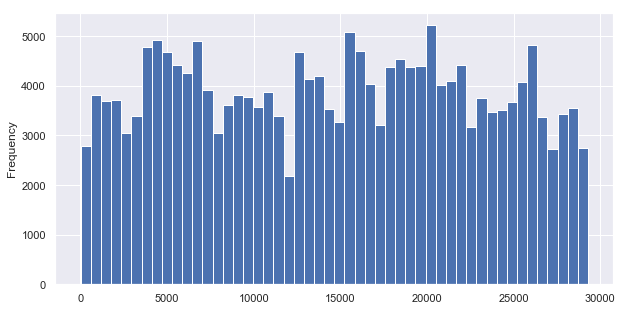

In [35]:
dd.head()
plt.figure(figsize=(10, 5))
dd.plot.hist(50);

In [36]:
data.add_features('patient_number', dd, True)

## Percentage of artefacts per frame

In [37]:
dd = pd.cut(data.impact['patient_number'], 25, labels=np.arange(0, 25, 1))
dd.head()

0    20
1     8
2     6
3     2
4    19
Name: patient_number, dtype: category
Categories (25, int64): [0 < 1 < 2 < 3 ... 21 < 22 < 23 < 24]

In [38]:
data.add_features('patient_bin', dd, False)

In [39]:
aggregation = {
    'is_artefact': [('artefact_number', 'sum'),
                    ('real_number'    , lambda x: sum(~x))]
}

dd = data.impact.groupby('patient_bin').aggregate(aggregation)
dd.head()

is_artefact            
            artefact_number real_number
patient_bin                            
0                     170.0        6443
1                     307.0        7103
2                     277.0        6150
3                     285.0        9413
4                     321.0        8768

In [40]:
dd['prop'] = dd['is_artefact', 'artefact_number'] / (dd['is_artefact', 'artefact_number'] + dd['is_artefact', 'real_number'])
dd.head()

is_artefact                  prop
            artefact_number real_number          
patient_bin                                      
0                     170.0        6443  0.025707
1                     307.0        7103  0.041430
2                     277.0        6150  0.043099
3                     285.0        9413  0.029388
4                     321.0        8768  0.035317

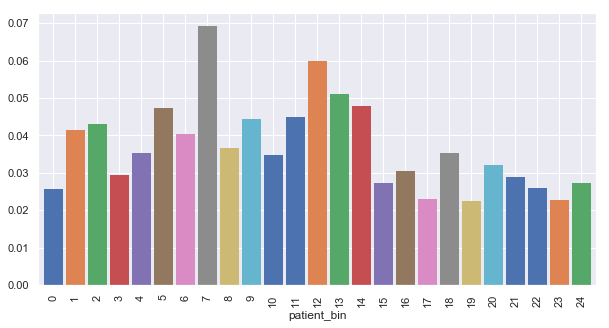

In [41]:
plt.figure(figsize=(10, 5))
dd['prop'].plot.bar(width=0.85, linewidth=0);

## Cheat feature

In [42]:
features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type', 'patient_bin']

X_cheat, y_cheat = data.process(features).get_X_and_y('all', range(0, data.positive_class_number))

In [43]:
display(get_table(y_cheat))

,count_,freq_
True,7199,50.00%
False,7199,50.00%


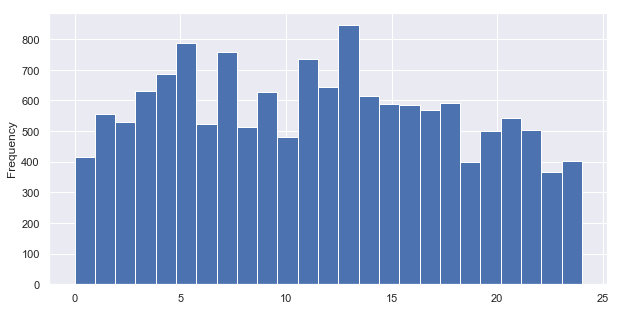

In [44]:
plt.figure(figsize=(10, 5))
X_cheat['patient_bin'].plot.hist(25);

In [53]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_cheat = Metrics(model, X_cheat, y_cheat, cv_strategy, n_jobs=5)
metrics_cheat.print_mean()

Run model...

KeyboardInterrupt: 

In [48]:
summary.summary.loc['RandomForest_shuffled']

NameError: name 'summary' is not defined

Fit model... done! (9.22s)


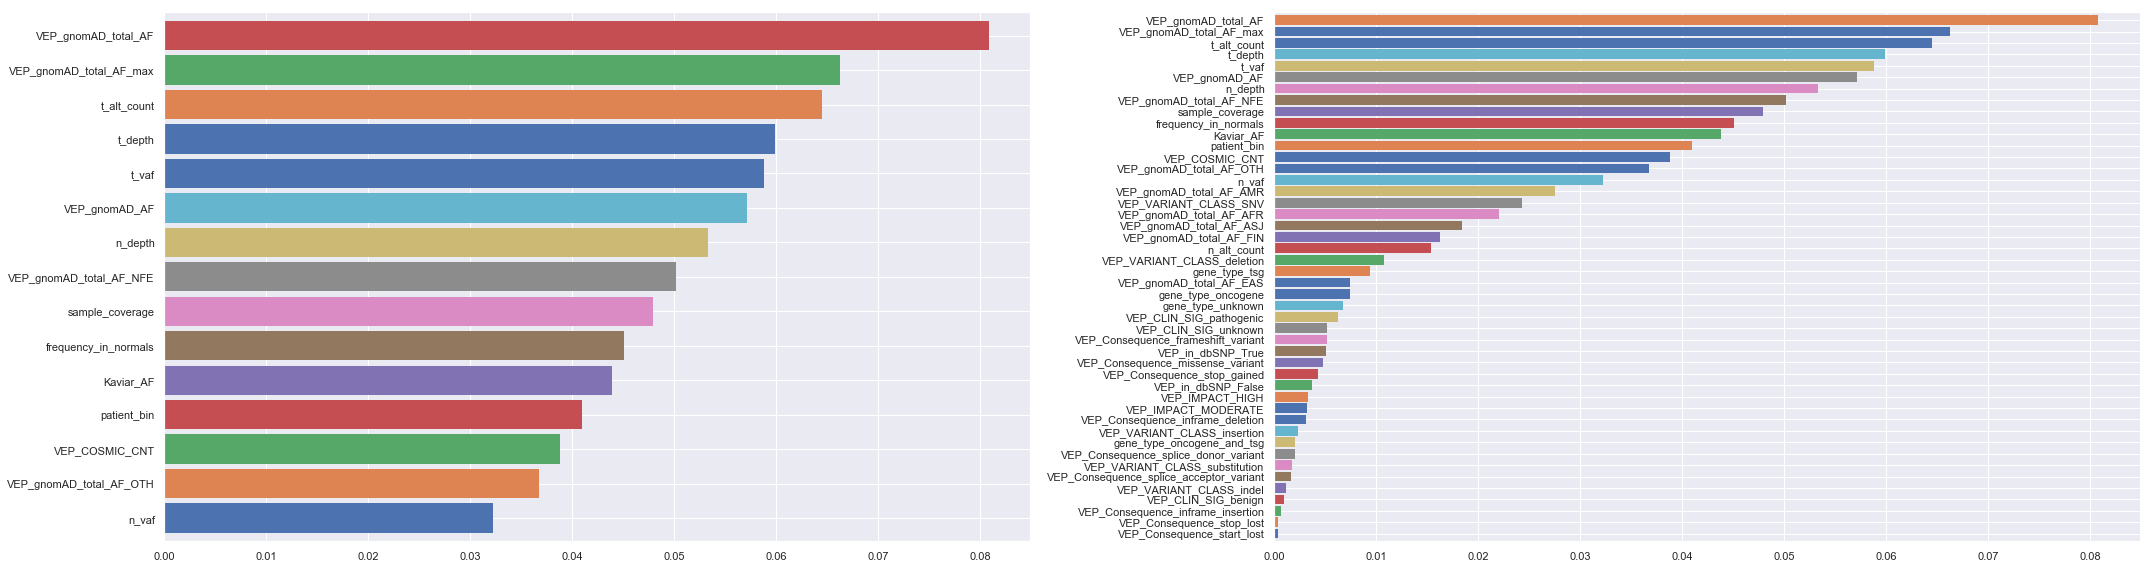

In [51]:
metrics_cheat.plot_features_importance(figsize=(30, 8), random_forest=False)

In [54]:
# choose a model and run it
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, loss='deviance', max_depth=6, n_estimators=500)

metrics_cheat = Metrics(model, X_cheat, y_cheat, cv_strategy, n_jobs=5)
metrics_cheat.print_mean()

Run model... done! (39.81s)
▴ Mean average_precision: 0.925 ± 0.007
▴ Mean roc_auc          : 0.907 ± 0.007
▴ Mean precision        : 0.872 ± 0.010
▴ Mean recall           : 0.781 ± 0.009
▴ Mean f1               : 0.824 ± 0.009
▴ Mean accuracy         : 0.833 ± 0.008


Fit model... done! (29.80s)


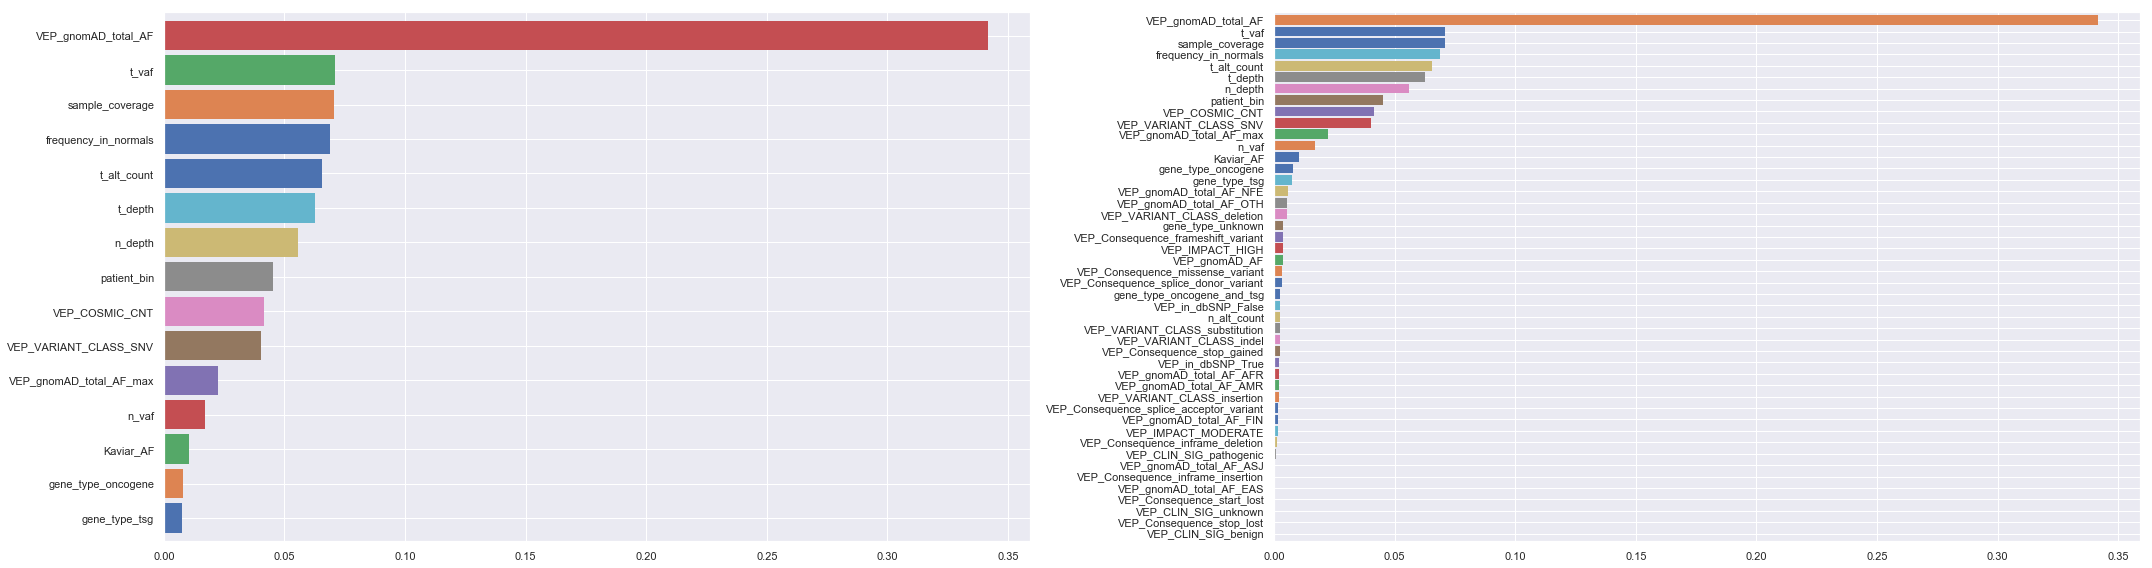

In [55]:
metrics_cheat.plot_features_importance(figsize=(30, 8))

## Frame variability

In [10]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)
data.impact = data.impact[data.impact['patient_key'] != 'None-T01-']
dd = data.impact['patient_key'].apply(lambda x: int(x[2:]))
data.add_features('patient_number', dd, True)
dd = pd.cut(data.impact['patient_number'], 25, labels=np.arange(0, 25, 1))
data.add_features('patient_bin', dd, True)

In [11]:
features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [12]:
data.negative_class_number / data.positive_class_number

25.97666342547576

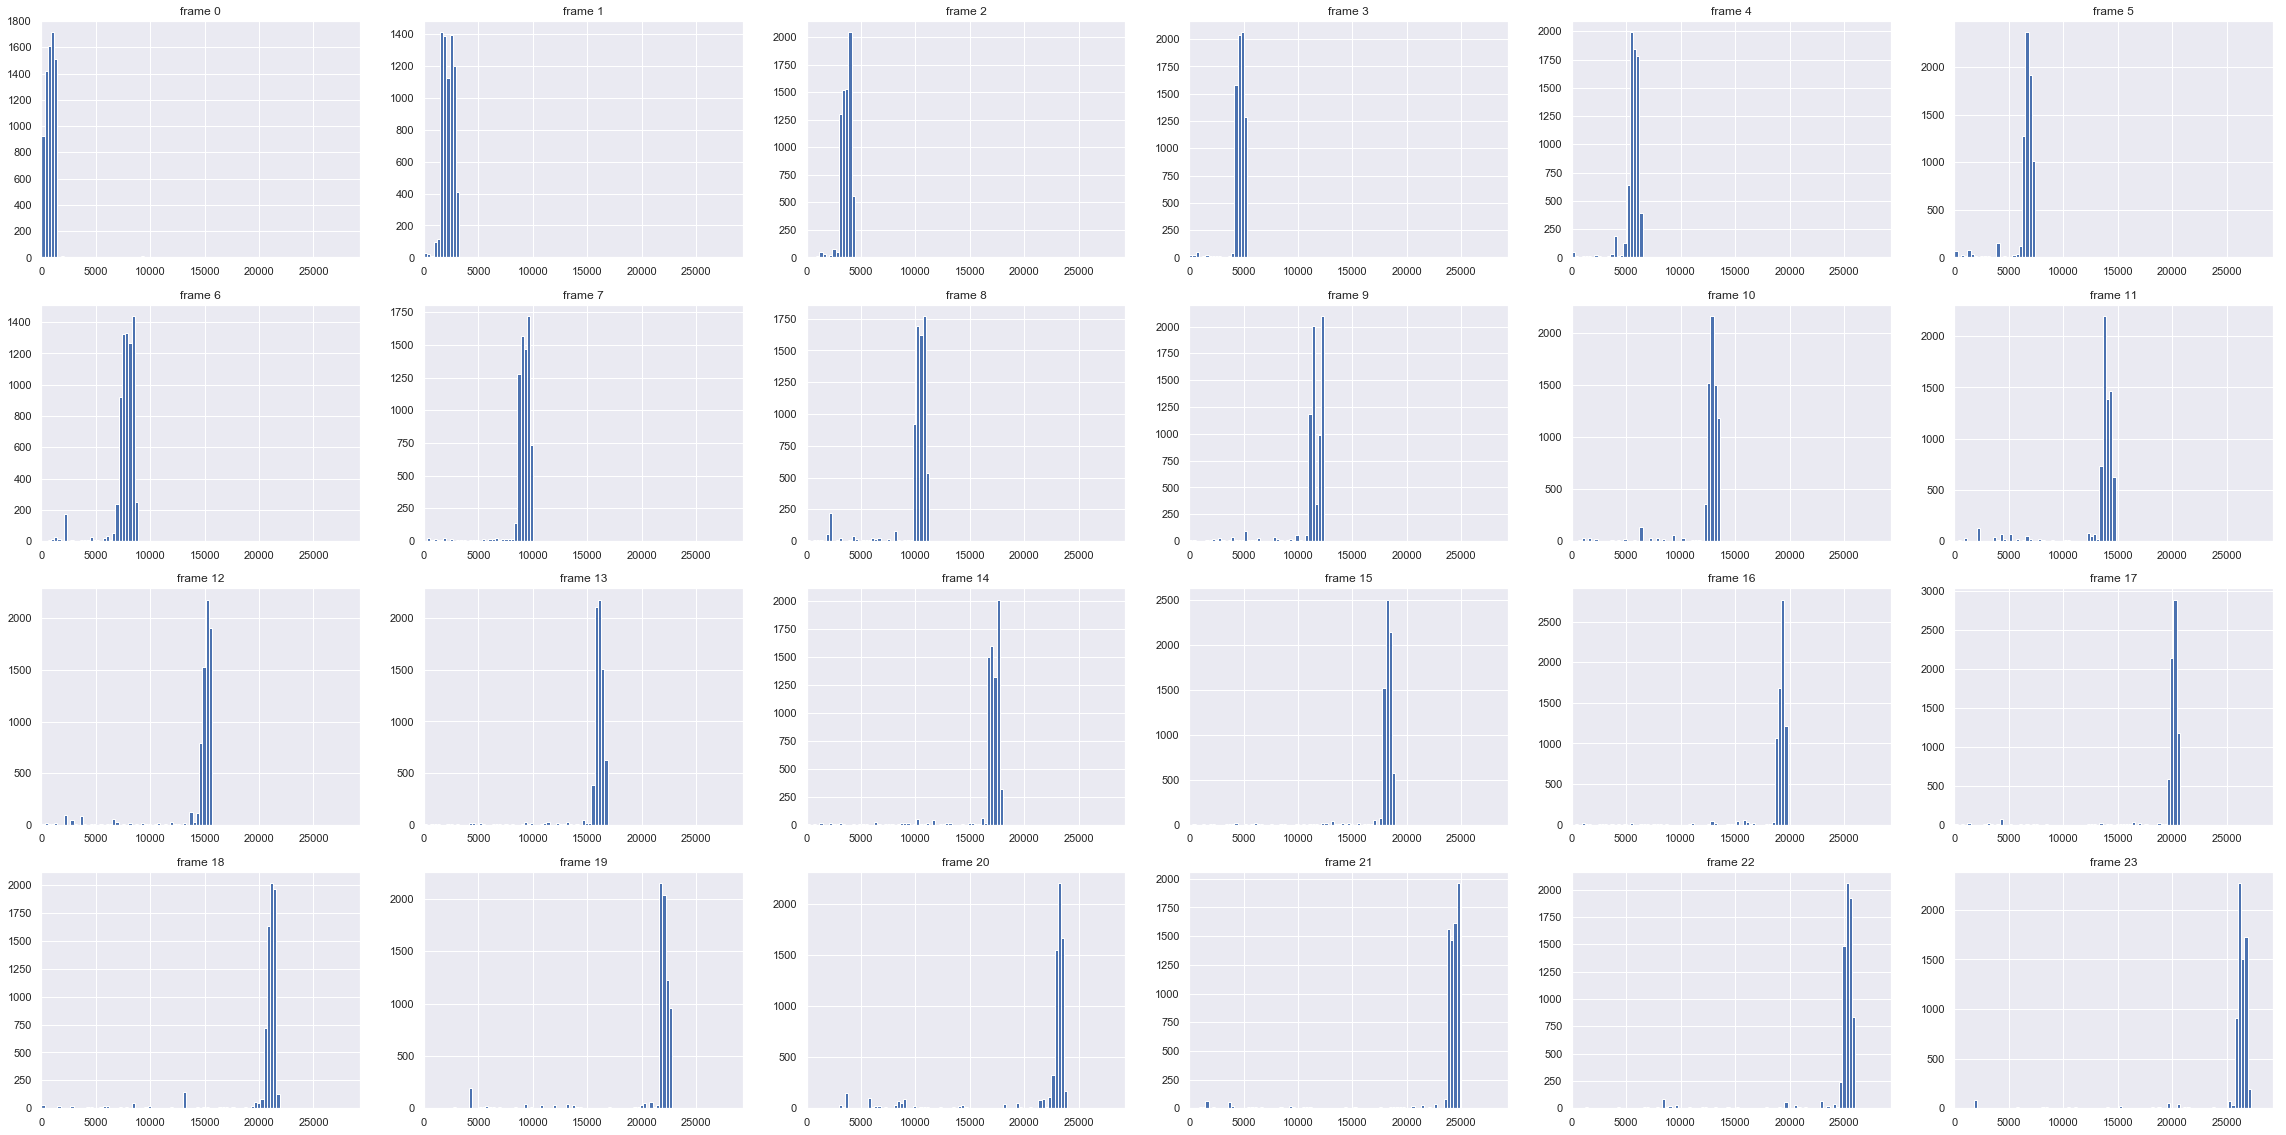

In [15]:
X_sorted_framed = []
y_sorted_framed = []

min_patient_number = data.impact['patient_number'].min()
max_patient_number = data.impact['patient_number'].max()

plt.figure(figsize=(40, 20))

for i in range(25): # 26
    X, y = data.get_X_and_y('all', range(i * data.positive_class_number, (i + 1) * data.positive_class_number))
    X_sorted_framed.append(X)
    y_sorted_framed.append(y)
    
    if i < 24:
        plt.subplot(4, 6, i + 1)

        plt.title('frame {}'.format(i))
        original_impact = data.get_original_impact()
        plt.hist(data.get_original_impact()[~y]['patient_number'], bins=np.linspace(min_patient_number, max_patient_number, 100))
        plt.xlim(min_patient_number, max_patient_number)

In [16]:
summary_4 = Summary(scoring=['average_precision', 'roc_auc'])

In [17]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

for i in range(25):
    print('Frame number {}/24'.format(i))
    metrics = Metrics(model, X_sorted_framed[i], y_sorted_framed[i], cv_strategy, n_jobs=5)
    summary_4.add(metrics, 'frame {}'.format(i), 'blue')

Frame number 0/24
Run model... done! (24.53s)
Frame number 1/24
Run model... done! (23.49s)
Frame number 2/24
Run model... done! (22.88s)
Frame number 3/24
Run model... done! (35.78s)
Frame number 4/24
Run model... done! (39.43s)
Frame number 5/24
Run model... done! (39.17s)
Frame number 6/24
Run model... done! (40.12s)
Frame number 7/24
Run model... done! (36.70s)
Frame number 8/24
Run model... done! (36.28s)
Frame number 9/24
Run model... done! (45.02s)
Frame number 10/24
Run model... done! (37.39s)
Frame number 11/24
Run model... done! (37.46s)
Frame number 12/24
Run model... done! (35.85s)
Frame number 13/24
Run model... done! (36.53s)
Frame number 14/24
Run model... done! (35.78s)
Frame number 15/24
Run model... done! (35.33s)
Frame number 16/24
Run model... done! (37.51s)
Frame number 17/24
Run model... done! (7.77s)
Frame number 18/24
Run model... done! (38.77s)
Frame number 19/24
Run model... done! (35.02s)
Frame number 20/24
Run model... done! (37.16s)
Frame number 21/24
Run m

In [18]:
summary_4.display()

,test_average_precision_mean,test_roc_auc_mean
metrics_name,,
frame 0,0.945,0.935
frame 1,0.943,0.931
frame 2,0.963,0.956
frame 3,0.932,0.918
frame 4,0.923,0.907
frame 5,0.934,0.921
frame 6,0.936,0.923
frame 7,0.941,0.931
frame 8,0.942,0.931


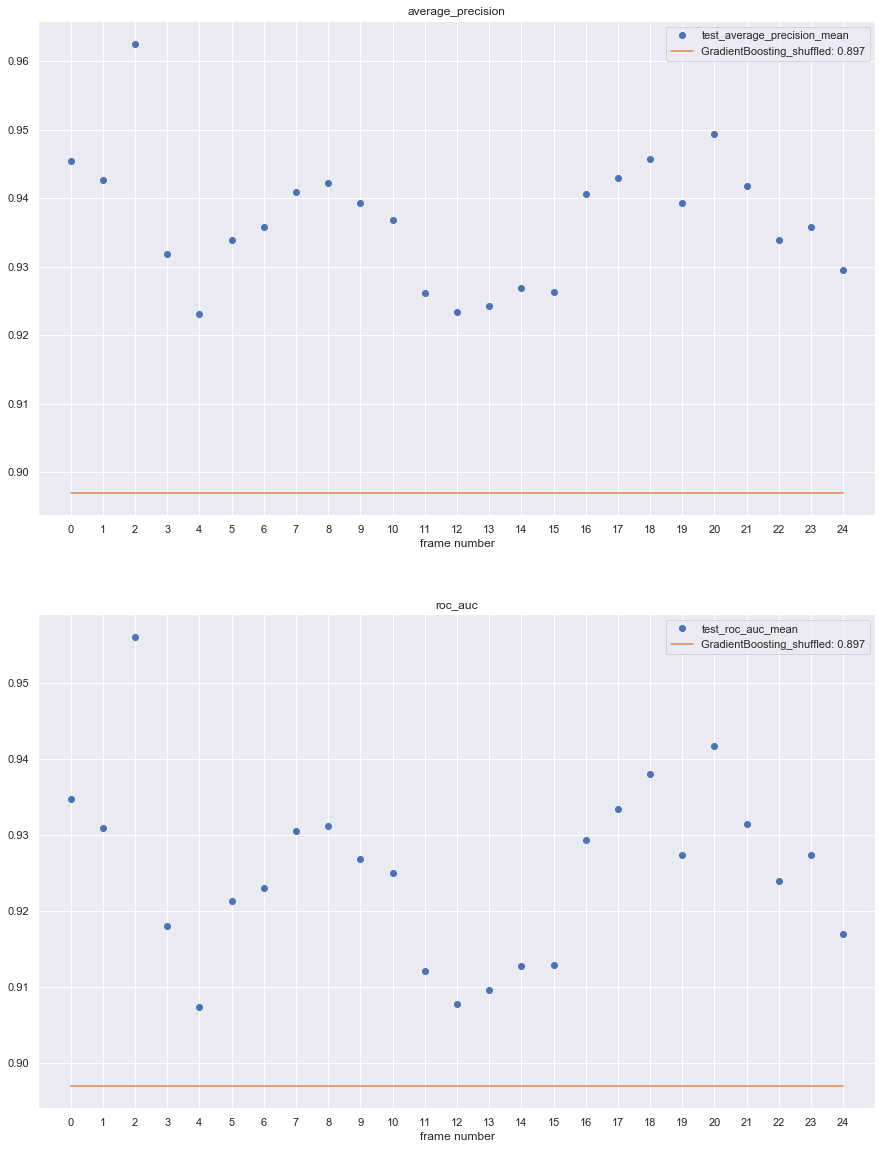

In [30]:
plt.figure(figsize=(15, 20))

for i, score_name in enumerate(summary_4.scoring):
    plt.subplot(2, 1, i + 1)
    plt.title(score_name)

    summary_4.summary['test_{}_mean'.format(score_name)].plot(style='o', linewidth=0)
    plt.xticks(range(0, 25), range(0, 25))
    plt.xlim(-1, 25)
    plt.xlabel('frame number')
    
    y_shuffled_score = 0.897
    plt.plot([0, 24], [y_shuffled_score, y_shuffled_score], label='GradientBoosting_shuffled: {:.3f}'.format(y_shuffled_score))
    plt.legend()

In [67]:
from scipy.stats import normaltest, ttest_rel

normaltest(summary_4.summary['test_{}_mean'.format('average_precision')])

for i, score_name in enumerate(summary.scoring):
    pvalue = normaltest(summary_4.summary['test_{}_mean'.format(score_name)]).pvalue
    print(pvalue > 0.05, pvalue)

True 0.2366500773881194
True 0.3480653674911052
True 0.22409448324880782
True 0.5350671147867214
True 0.2592989805660521
True 0.11165457159614299


## Train restrained to frame

In [50]:
X_sorted_framed = []
y_sorted_framed = []
plt.figure(figsize=(40, 20))

for i in range(25): # 26
    X, y = data.get_X_and_y(range(i * data.positive_class_number // 25, (i + 1) * data.positive_class_number // 25), range(i * data.positive_class_number, (i + 1) * data.positive_class_number))
    X_sorted_framed.append(X)
    y_sorted_framed.append(y)
    Impact_Wrapper.print_info(X, y)

X: (7486, 45) | y: (7486,)


,count_,freq_
False,7199,96.2%
True,287,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


X: (7487, 45) | y: (7487,)


,count_,freq_
False,7199,96.2%
True,288,3.8%


<Figure size 2880x1440 with 0 Axes>

In [51]:
summary_5 = Summary()

In [52]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42))

for i in range(25):
    print('Frame number {}/24'.format(i))
    metrics = Metrics(model, X_sorted_framed[i], y_sorted_framed[i], cv_strategy, n_jobs=5)
    summary_5.add(metrics, 'frame {}'.format(i), 'blue')

Frame number 0/24
Run model... done! (6.72s)
Frame number 1/24
Run model... done! (5.80s)
Frame number 2/24
Run model... done! (5.87s)
Frame number 3/24
Run model... done! (5.80s)
Frame number 4/24
Run model... done! (6.05s)
Frame number 5/24
Run model... done! (5.74s)
Frame number 6/24
Run model... done! (6.39s)
Frame number 7/24
Run model... done! (6.18s)
Frame number 8/24
Run model... done! (5.80s)
Frame number 9/24
Run model... done! (5.71s)
Frame number 10/24
Run model... done! (5.51s)
Frame number 11/24
Run model... done! (5.77s)
Frame number 12/24
Run model... done! (5.88s)
Frame number 13/24
Run model... done! (5.73s)
Frame number 14/24
Run model... done! (5.91s)
Frame number 15/24
Run model... done! (5.87s)
Frame number 16/24
Run model... done! (6.18s)
Frame number 17/24
Run model... done! (5.70s)
Frame number 18/24
Run model... done! (6.14s)
Frame number 19/24
Run model... done! (5.95s)
Frame number 20/24
Run model... done! (6.07s)
Frame number 21/24
Run model... done! (6.03s

In [53]:
summary_5.display()

,test_average_precision_mean,test_roc_auc_mean,test_precision_mean,test_recall_mean,test_f1_mean,test_accuracy_mean
metrics_name,,,,,,
frame 0,0.596,0.868,0.235,0.728,0.355,0.898
frame 1,0.534,0.858,0.168,0.684,0.268,0.854
frame 2,0.562,0.888,0.207,0.746,0.323,0.879
frame 3,0.49,0.85,0.155,0.677,0.252,0.844
frame 4,0.562,0.87,0.222,0.722,0.338,0.891
frame 5,0.609,0.904,0.241,0.774,0.365,0.894
frame 6,0.678,0.901,0.277,0.785,0.409,0.912
frame 7,0.606,0.885,0.23,0.736,0.348,0.894
frame 8,0.642,0.907,0.233,0.805,0.36,0.888


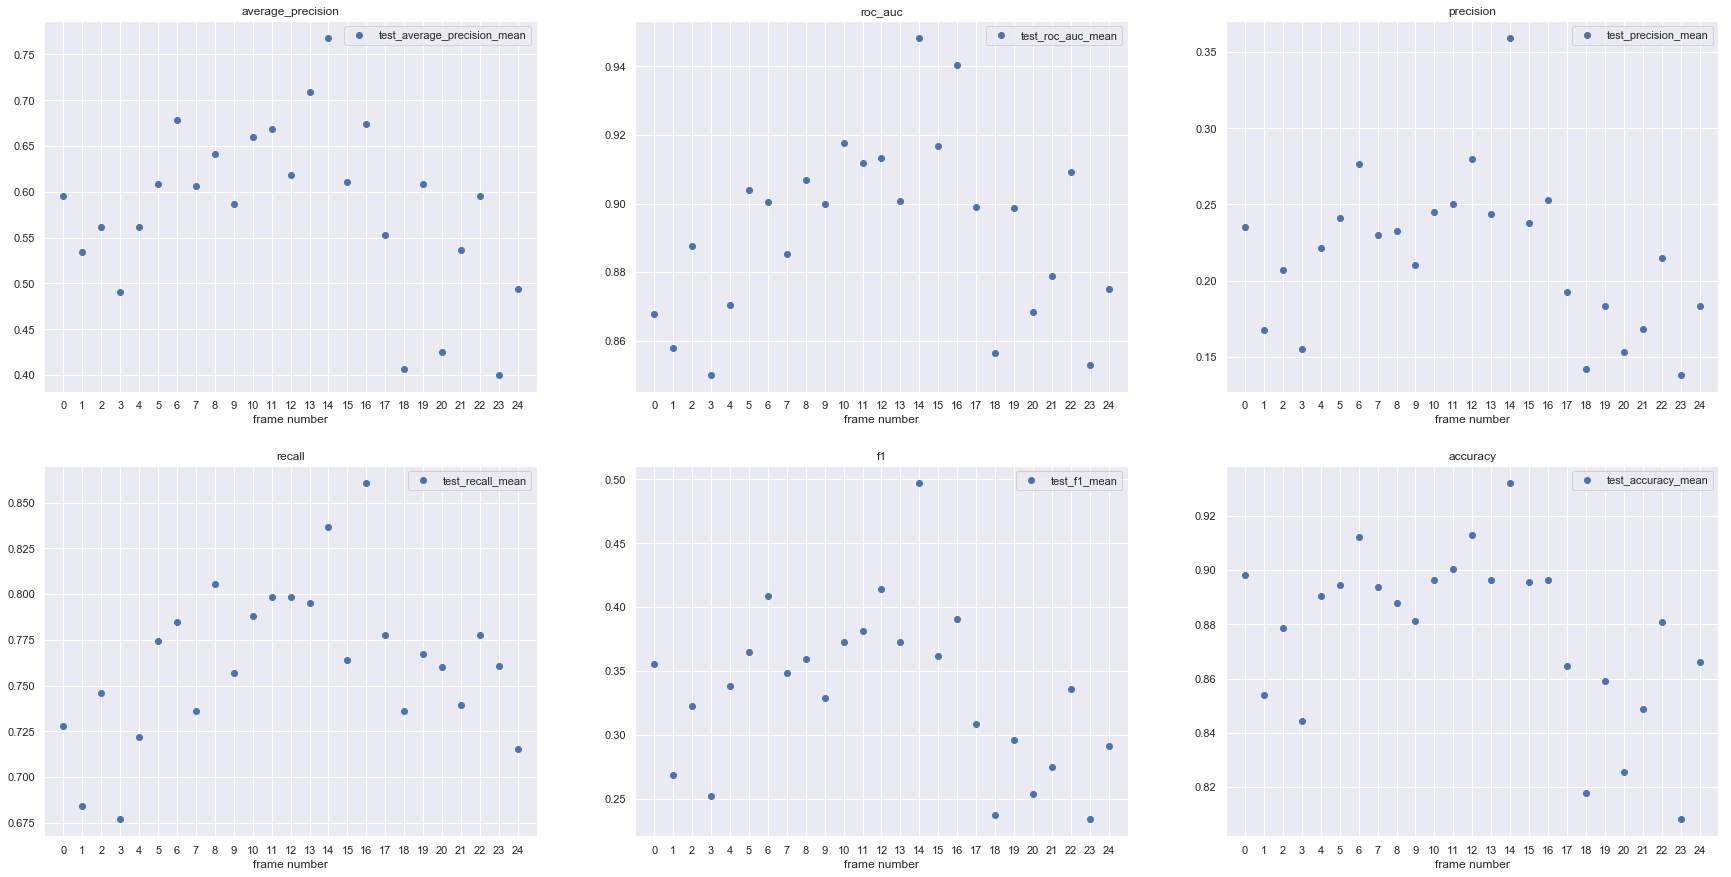

In [55]:
plt.figure(figsize=(30, 15))

for i, score_name in enumerate(summary_5.scoring):
    plt.subplot(2, len(summary_5.scoring) // 2, i + 1)
    plt.title(score_name)

    summary_5.summary['test_{}_mean'.format(score_name)].plot(style='o', linewidth=0)
    plt.xticks(range(0, 25), range(0, 25))
    plt.xlim(-1, 25)
    plt.xlabel('frame number')
    
    #y_shuffled_score = summary.summary.loc['RandomForest_shuffled']['test_{}_mean'.format(score_name)]
    #plt.plot([0, 24], [y_shuffled_score, y_shuffled_score], label='RandomForest_shuffled: {:.3f}'.format(y_shuffled_score))
    plt.legend()

In [59]:
from scipy.stats import normaltest, ttest_rel

normaltest(summary_5.summary['test_{}_mean'.format('average_precision')])

for i, score_name in enumerate(summary_5.scoring):
    pvalue = normaltest(summary_5.summary['test_{}_mean'.format(score_name)]).pvalue
    print(pvalue > 0.05, pvalue)

True 0.6657609059797851
True 0.8858525419889774
True 0.1531918348640671
True 0.7672498851555345
True 0.5678480523688609
True 0.29194465286941734


# GroupKFold for mutation key

## Get *shuffled* sampling

In [4]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [5]:
X_shuffled, y_shuffled = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_shuffled, y_shuffled)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [6]:
groups_shuffled = data.get_original_impact()['mut_key'].values

## Get *sorted* sampling

In [9]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [10]:
X_sorted, y_sorted = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_sorted, y_sorted)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [17]:
groups_sorted = data.get_original_impact()['mut_key'].values

## Ridge Regression (L2 regularization)

In [18]:
from sklearn.model_selection import GroupKFold, StratifiedKFold
cv_strategy = GroupKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [19]:
summary_5 = Summary()

In [20]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, groups=groups_shuffled, n_jobs=5)
metrics_shuffled.print_mean()
summary_5.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, groups=groups_sorted, n_jobs=5)
metrics_sorted.print_mean()
summary_5.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (3.31s)
▴ Mean average_precision: 0.879 ± 0.003
▴ Mean roc_auc          : 0.846 ± 0.005
▴ Mean precision        : 0.879 ± 0.008
▴ Mean recall           : 0.650 ± 0.015
▴ Mean f1               : 0.747 ± 0.012
▴ Mean accuracy         : 0.780 ± 0.011

Run model... done! (3.46s)
▴ Mean average_precision: 0.912 ± 0.008
▴ Mean roc_auc          : 0.890 ± 0.013
▴ Mean precision        : 0.885 ± 0.005
▴ Mean recall           : 0.738 ± 0.023
▴ Mean f1               : 0.804 ± 0.013
▴ Mean accuracy         : 0.821 ± 0.010


## Random Forest

In [22]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, groups=groups_shuffled, n_jobs=5)
metrics_shuffled.print_mean()
summary_5.add(metrics_shuffled, 'RandomForest_shuffled', 'indigo')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, groups=groups_sorted, n_jobs=5)
metrics_sorted.print_mean()
summary_5.add(metrics_sorted, 'RandomForest_sorted', 'navy')

Run model... done! (22.30s)
▴ Mean average_precision: 0.915 ± 0.002
▴ Mean roc_auc          : 0.896 ± 0.003
▴ Mean precision        : 0.887 ± 0.016
▴ Mean recall           : 0.729 ± 0.005
▴ Mean f1               : 0.801 ± 0.004
▴ Mean accuracy         : 0.818 ± 0.005

Run model... done! (23.53s)
▴ Mean average_precision: 0.942 ± 0.007
▴ Mean roc_auc          : 0.931 ± 0.009
▴ Mean precision        : 0.899 ± 0.008
▴ Mean recall           : 0.808 ± 0.021
▴ Mean f1               : 0.851 ± 0.012
▴ Mean accuracy         : 0.858 ± 0.010


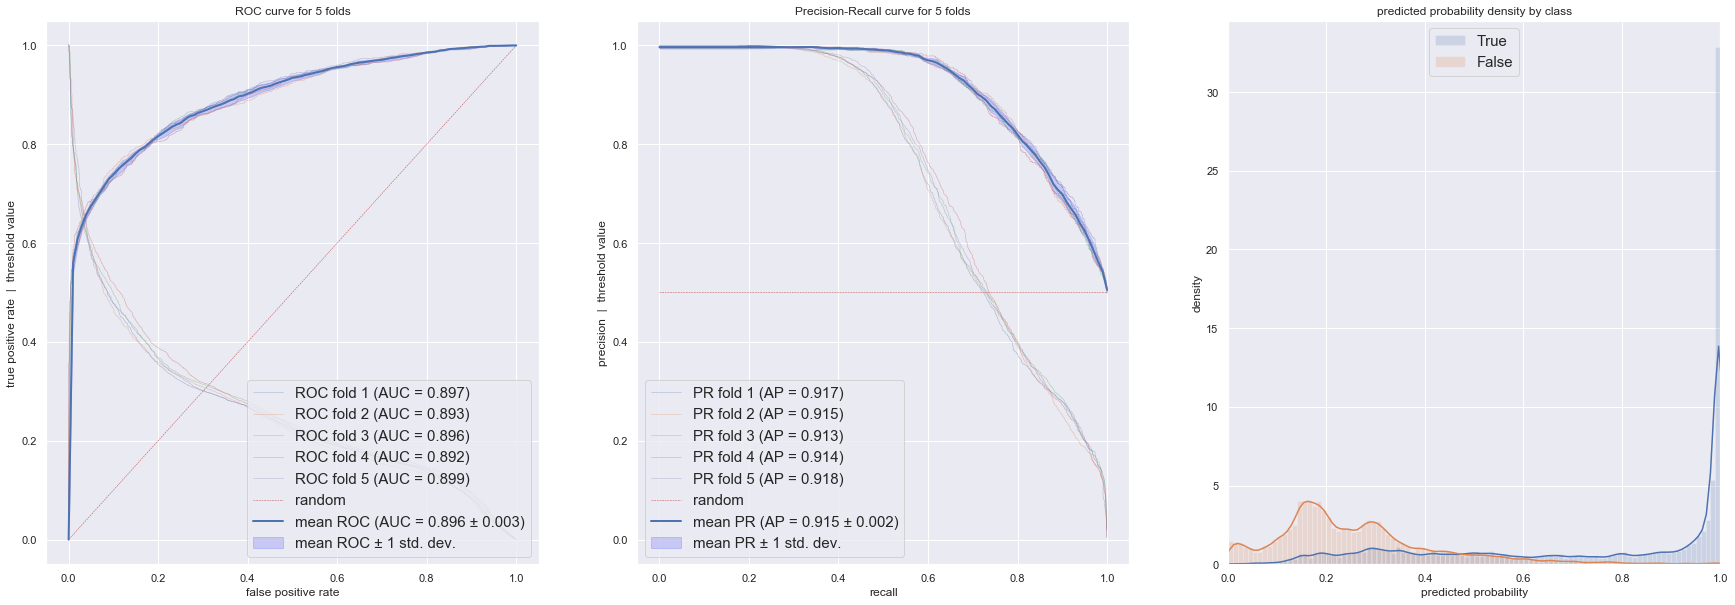

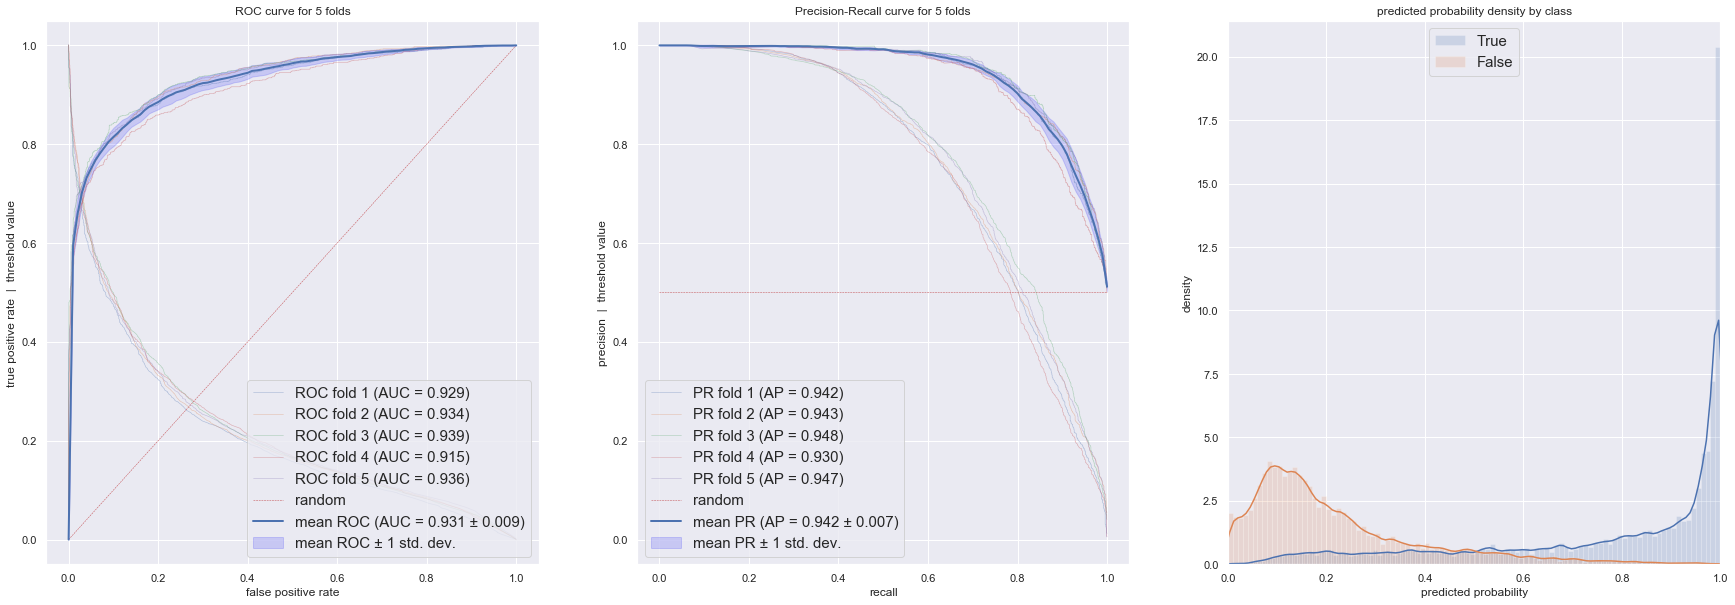

In [23]:
metrics_shuffled.plot_threshold_decision_curves()
metrics_sorted.plot_threshold_decision_curves()

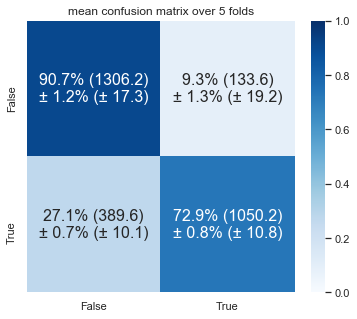

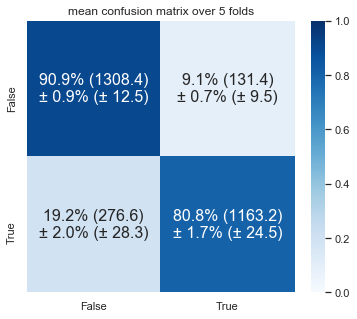

In [24]:
metrics_shuffled.plot_mean_confusion_matrix()
metrics_sorted.plot_mean_confusion_matrix()

,test_average_precision_mean,test_roc_auc_mean,test_precision_mean,test_recall_mean,test_f1_mean,test_accuracy_mean
metrics_name,,,,,,
RidgeRegression_shuffled,0.879,0.846,0.879,0.65,0.747,0.78
RidgeRegression_sorted,0.912,0.89,0.885,0.738,0.804,0.821
RandomForest_shuffled,0.915,0.896,0.887,0.729,0.801,0.818
RandomForest_sorted,0.942,0.931,0.899,0.808,0.851,0.858


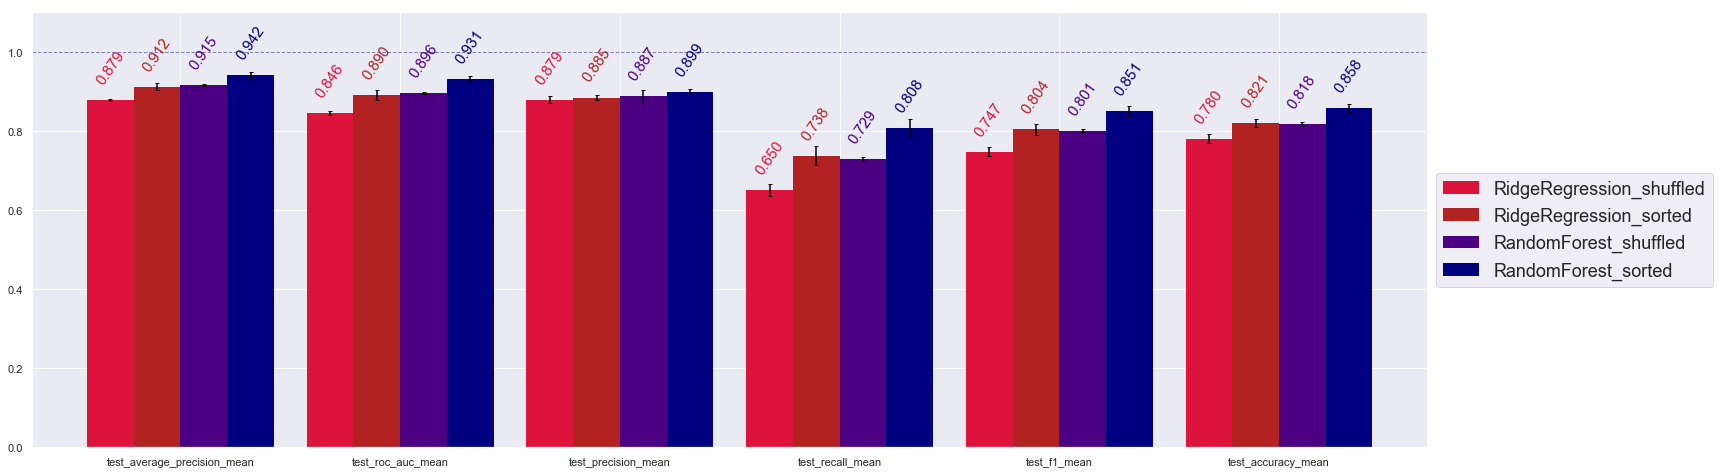

In [25]:
summary_5.display()
summary_5.plot(fontsize=15)